# Gather

In [1]:
import requests 
import numpy as np 
import pandas as pd 
import tweepy 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from timeit import default_timer as timer

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
predict = pd.read_csv("image_predictions.tsv", sep='\t')

predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
#keys and token to access the API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [32]:
tweet_ids = archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [5]:
#query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
# List of dictionaries to build and convert to a DataFrame later
twitter_api = []

#create a new file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        twitter_api.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
twitter = pd.DataFrame(twitter_api, columns=['tweet_id','favorites','retweets'])

In [6]:
twitter.head()

,tweet_id,favorites,retweets
0,892420643555336193,35277,7437
1,892177421306343426,30509,5526
2,891815181378084864,22953,3649
3,891689557279858688,38552,7615
4,891327558926688256,36843,8194


# Assess

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Here we can spot two problems - timestamp should be datetime and tweet_id should be str

In [9]:
archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Milo           6
Stanley        6
Leo            6
Bella          6
Dave           6
Scout          6
Rusty          6
Oscar          6
Jack           6
Jax            6
Koda           6
George         5
            ... 
Jessifer       1
Rolf           1
Kingsley       1
Brockly        1
Ronnie         1
Iroh           1
Rilo           1
Ito            1
Genevieve      1
Superpup       1
Geoff          1
Tino           1
Eazy           1
Duddles        1
Harrison       1
Jangle         1
Dallas         1
Noah           1
Kallie         1
Millie         1
Wafer          1
Gustaf         1
Herb           1
Lolo           1
Stephanus      1
Chuck          1
Dwight         1
Dunkin        

There are incorrect names like None, a, an and the

In [10]:
archive.duplicated().value_counts()

False    2356
dtype: int64

In [19]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There is no duplicated data

In [11]:
#check what does the NAN mean
archive[archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [20]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
pd.set_option('display.max_colwidth', -1)
archive['text'].head(50)

0     This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3     This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5     Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) 

We need to clear the retweets (i.e. retweeted_status_id should be null). We can also see that there are decima rating that got input wrong. so we need to extract those properly.

In [12]:
#moving on to the predict table, visually we can see that there're different cases & underscores, we need to clean those
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#again tweet_id should be changed to str
predict['tweet_id'].duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [14]:
predict['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [15]:
twitter.head()

,tweet_id,favorites,retweets
0,892420643555336193,35277,7437
1,892177421306343426,30509,5526
2,891815181378084864,22953,3649
3,891689557279858688,38552,7615
4,891327558926688256,36843,8194


In [16]:
#there are duplicated jpg url links, which means that it also contains retweet, need cleaning
twitter.isnull().any()

tweet_id     False
favorites    False
retweets     False
dtype: bool

In [17]:
twitter.duplicated().any()

False

## Tidiness
- We should merge the three tables into one master dataframe
- We can consolidate the four "category" columns into one

## Quality:
1. Changing data type: timestamp should be date and time, tweet_id should be str and favourites, img_num and retweets should be int
2. some dog names are incorrect (none, a, an)
3. we should clean the retweets in both archive and predict (i.e., retweeted related columns should only contain np.nan)
4. we can drop the 'in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and 'retweeted_status_id' since we will be focusing on analyzing the original tweets
5. we should consolidate rating_numerator and rating_denominator into one "rating" column
6. we should change breed prediction columns' case problems & replace underscores with space
7. we can simplify the source columns as there are only four sources: vine, phone, web and deck
8. Extract decimal rating_numerator entries properly.

# Clean

In [25]:
archive_clean = archive.copy()
predict_clean = predict.copy()
twitter_clean = twitter.copy()

### Merging

#### Define
Merge the three table into one master sheet

#### Code

In [26]:
archive_clean = pd.merge(archive_clean, twitter_clean,
                            on=['tweet_id'], how='inner')

In [27]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,35277,7437
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,30509,5526
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,22953,3649
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,38552,7615
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,36843,8194


In [28]:
archive_clean = pd.merge(archive_clean, predict_clean,
                            on=['tweet_id'], how='inner')

#### Test

In [29]:
archive_clean['favorites'].isnull().any()

False

In [30]:
archive_clean['p1'].isnull().any()

False

### Variable Type

#### Define
change the timestamp column data type to datetime
#### code

In [31]:
#timestamp should be date and time
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Define
change the tweet_id column data type to str 
#### code

In [32]:
#tweet_id should be str in all three table
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Define
change favourites, img_num and retweets to int

#### code

In [33]:
archive_clean['favorites'] = archive_clean['favorites'].astype(int)
archive_clean['retweets'] = archive_clean['retweets'].astype(int)
archive_clean['img_num'] = archive_clean['img_num'].astype(int)

#### Test

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null datetime64[ns]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                 

### Clearing retweets

#### Define
Delete retweets and only keep original tweets
#### code

In [35]:
#delete the retweets
#firstly get a list of the retweets
retweets = archive_clean[archive_clean.retweeted_status_id.notnull()]
#then delete these retweets
archive_clean = archive_clean.drop(retweets.index, axis=0) # Step 2

In [36]:
#delete the retweets
#same for nan jpg
retweets = archive_clean[archive_clean.jpg_url.isnull()]
#then delete these retweets
archive_clean = archive_clean.drop(retweets.index, axis=0) # Step 2

#### Test

In [37]:
archive_clean.retweeted_status_id.notnull().any()

False

In [38]:
archive_clean.jpg_url.isnull().any()

False

In [39]:
archive_clean.img_num.isnull().any()

False

### Clearing irrelevant columns

#### Define
We now can move on to delete retweet / reply related columns since we won't use them for analysis later
#### code

In [40]:
#drop in_reply and retween columns that we don't need
archive_clean.drop(columns = ['in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True )

In [41]:
archive_clean.drop(columns = ['retweeted_status_id'], inplace = True )

#### Test

In [42]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Decimal rating

#### Define
We need to extract decimal rating numerator properly
#### code

In [60]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5
548,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
603,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1438,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [61]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

In [62]:
archive_clean.loc[40, 'rating_numerator'] = 13.5
archive_clean.loc[548, 'rating_numerator'] = 9.75
archive_clean.loc[603, 'rating_numerator'] = 11.27
archive_clean.loc[1438, 'rating_numerator'] = 11.26

#### test

In [63]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
548,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
603,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1438,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


### Consolidating columns

#### Define
We can combine the two rating related columns into one

#### code

In [64]:
#add a rating column
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [66]:
#we can drop deno and nume columns
archive_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True )

#### Test

In [67]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


#### Define
We can combine the classification columns into one
#### code

In [68]:
#we can clean columns that don't have a category with a NAN, and consolidate them into one col
for x in ["doggo", "floofer", "pupper", "puppo"]:
    archive_clean[x].replace("None", "", inplace = True)

In [69]:
#concat the three columns together
archive_clean['category'] = archive_clean['doggo'] + archive_clean['floofer']+ archive_clean['pupper'] + archive_clean['puppo']

In [70]:
archive_clean['category'].value_counts()

                1682
pupper          203 
doggo           62  
puppo           22  
doggopupper     9   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: category, dtype: int64

In [71]:
#replace the '' with a nan
archive_clean['category'].replace("", np.nan, inplace = True)

In [72]:
#read read through the texts for the 10 occurances and fix them manually
pd.set_option('display.max_colwidth', -1)

archive_clean[archive_clean['category'] == 'doggopupper']['text']

357    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
420    Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
448    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
454    This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
556    This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
711    Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co

In [73]:
archive_clean.loc[357, 'category'] = "pupper"
archive_clean.loc[420, 'category'] = np.nan #two dogs
archive_clean.loc[448, 'category'] = np.nan #two dogs
archive_clean.loc[454, 'category'] = "pupper"
archive_clean.loc[556, 'category'] = "doggo"
archive_clean.loc[711, 'category'] = np.nan #two dogs
archive_clean.loc[767, 'category'] = np.nan #not a dog
archive_clean.loc[858, 'category'] = np.nan #two dogs
archive_clean.loc[904, 'category'] = np.nan #two dogs

In [74]:
pd.set_option('display.max_colwidth', -1)

archive_clean[archive_clean['category'] == 'doggopuppo']['text']

151    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

In [75]:
archive_clean.loc[151, 'category'] = "puppo"

In [76]:
archive_clean[archive_clean['category'] == 'doggofloofer']['text']

157    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

In [77]:
archive_clean.loc[157, 'category'] = "floofer"

In [78]:
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True )

In [79]:
archive_clean['category'].value_counts()

pupper     205
doggo      63 
puppo      23 
floofer    8  
Name: category, dtype: int64

#### Define
For the purpose of the analysis, let's only keep the entries with a breed prediection and only keep the p1 prediction (the highest one)
#### code

In [80]:
archive_clean = archive_clean[archive_clean['p1_dog'] == True]

In [81]:
archive_clean.rename(columns={"p1": "breed"}, inplace = True)

In [82]:
archive_clean.drop(columns = ['p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf'], inplace = True )

#### Test

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2058
Data columns (total 13 columns):
tweet_id         1470 non-null object
timestamp        1470 non-null datetime64[ns]
source           1470 non-null object
text             1470 non-null object
expanded_urls    1470 non-null object
name             1470 non-null object
favorites        1470 non-null int64
retweets         1470 non-null int64
jpg_url          1470 non-null object
img_num          1470 non-null int64
breed            1470 non-null object
rating           1470 non-null float64
category         221 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 160.8+ KB


### Content & Formatting

#### Define
Change the capitalization and underscores in breed
#### code

In [84]:
#change the spelling of p1, p2, and p3 to all lowercase
archive_clean['breed'] = archive_clean['breed'].str.lower()

In [85]:
#replace _ with space
archive_clean['breed'] = archive_clean['breed'].str.replace('_',' ')


#### Test

In [86]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,breed,rating,category
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,30509,5526,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,22953,3649,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,1.2,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,36843,8194,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,1.2,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,18572,2751,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,1.3,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,10798,1780,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,1.3,NaN


### Content & Formatting

#### Define
Get ride of the wrong names
#### code

In [87]:
#replace wrong names
for x in ["None", "a", "by", "the", "not"]:
    archive_clean["name"].replace(x, np.nan, inplace = True)

#### Test

In [88]:
archive_clean['name'].value_counts()

Cooper          10
Charlie         9 
Oliver          9 
Tucker          8 
Lucy            7 
Sadie           7 
Daisy           7 
Penny           7 
Winston         6 
Jax             6 
Koda            6 
Stanley         5 
Rusty           5 
Toby            5 
Bella           5 
Bo              5 
Leo             5 
Dexter          4 
Louis           4 
Oscar           4 
Sophie          4 
Gus             4 
Finn            4 
Lola            4 
Chester         4 
George          4 
Scooter         4 
Maggie          4 
Brody           4 
Larry           4 
               .. 
Alexanderson    1 
Lilah           1 
Terrenth        1 
Cal             1 
Rontu           1 
Mosby           1 
Percy           1 
Orion           1 
DonDon          1 
Coops           1 
Lambeau         1 
Lorelei         1 
Davey           1 
Tycho           1 
Augie           1 
Tug             1 
Dook            1 
Smiley          1 
Torque          1 
Tebow           1 
Billl           1 
Sora        

### Content & Formatting

#### Define
Simplify the source column
#### code

In [90]:
archive_clean["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "Twitter for iPhone", inplace = True)
archive_clean["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine", inplace = True)
archive_clean["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Twitter Web Client", inplace = True)
archive_clean["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "TweetDeck", inplace = True)

#### Test

In [91]:
archive_clean.source.value_counts()

Twitter for iPhone    1445
Twitter Web Client    19  
TweetDeck             6   
Name: source, dtype: int64

In [104]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## analysis

1. which dog breeds get the highest rating in average
2. which dog breeds get the most favourites and retweets
3. when does this account usually post tweet

In [93]:
temp = archive_clean.groupby('breed', sort = True)['rating'].mean().sort_values(ascending=False)

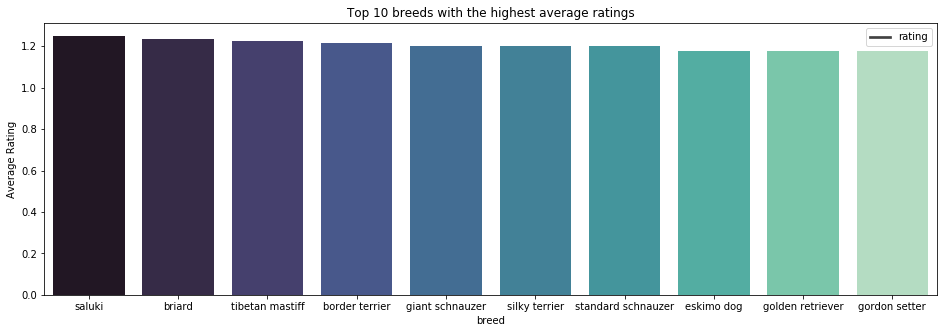

In [94]:
temp = temp.head(10)
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x=temp.index, y=temp.values, palette="mako").set_title("Top 10 breeds with the highest average ratings")
plt.ylabel("Average Rating")
plt.legend(labels=["rating"])

In [95]:
temp = archive_clean.groupby('breed')['retweets'].mean().sort_values(ascending=False)

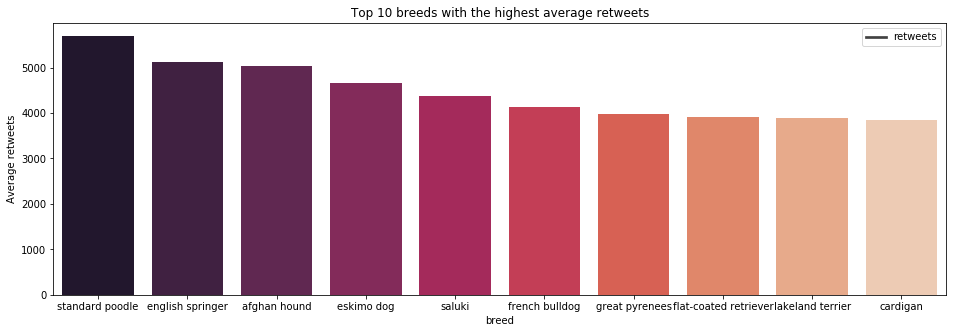

In [96]:
temp = temp.head(10)
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x=temp.index, y=temp.values, palette="rocket").set_title("Top 10 breeds with the highest average retweets")
plt.ylabel("Average retweets")
plt.legend(labels=["retweets"])

In [97]:
temp = archive_clean.groupby('breed')['favorites'].mean().sort_values(ascending=False)

(12000, 22000)

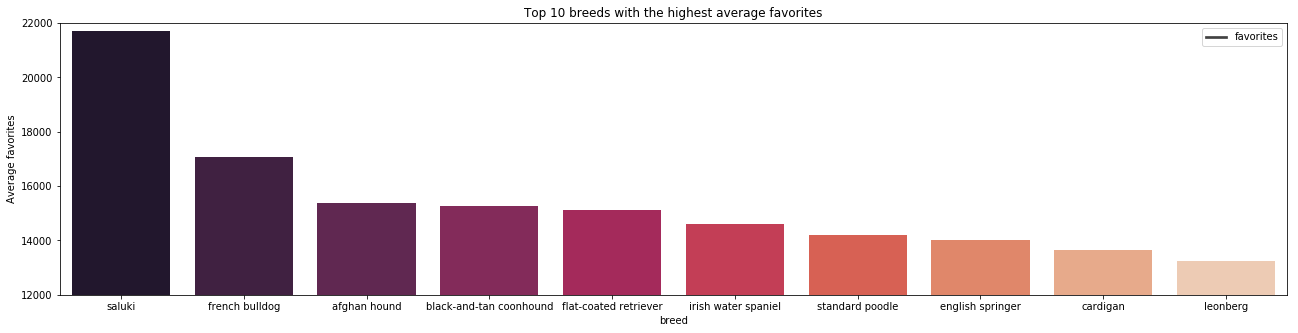

In [98]:
temp = temp.head(10)
fig, ax = plt.subplots(figsize = (22,5))
ax = sns.barplot(x=temp.index, y=temp.values, palette="rocket").set_title("Top 10 breeds with the highest average favorites")
plt.ylabel("Average favorites")
plt.legend(labels=["favorites"])
plt.ylim(12000, 22000)

In [99]:
temp_time = archive_clean.copy()

In [100]:
temp_time["month"] = temp_time["timestamp"].apply(lambda x: x.month)
temp_time["hour"] = temp_time["timestamp"].apply(lambda x: x.hour)
temp_time["year"] = temp_time["timestamp"].apply(lambda x: x.year)

In [101]:
temp_time.head()

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,breed,rating,category,month,hour,year
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,30509,5526,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,1.3,NaN,8,0,2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,22953,3649,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,1.2,NaN,7,0,2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,36843,8194,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,1.2,NaN,7,16,2017
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,18572,2751,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,1.3,NaN,7,0,2017
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,10798,1780,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,1.3,NaN,7,16,2017


Text(0.5,1,'Numbers of tweets going out in each month')

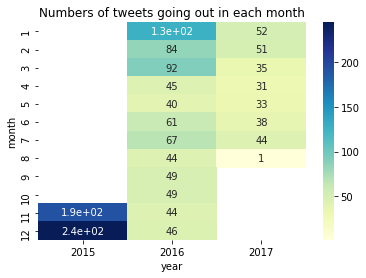

In [102]:
temp_time['count'] = 1
df2= temp_time.groupby(['year','month'], as_index=False).count()
df_p = pd.pivot_table(df2,'count','month','year')


sns.heatmap(df_p, annot=True, cmap="YlGnBu").set_title("Numbers of tweets going out in each month")


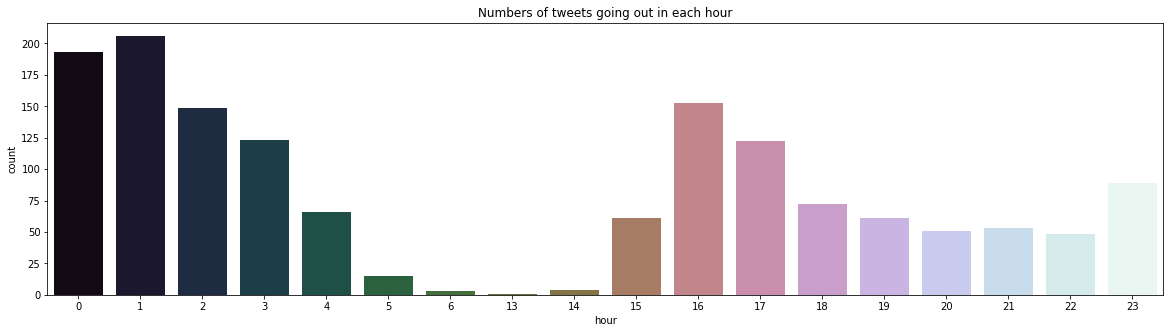

In [103]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.countplot(x = "hour", data = temp_time, palette = "cubehelix").set_title("Numbers of tweets going out in each hour")